#Store Recommendation System

##Importing libraries

In [ ]:
# Suppressing warnings for cleaner output
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Importing essential data handling libraries
import pandas as pd
import numpy as np

# Importing visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning utilities
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import cosine_similarity

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

## Importing Dataset

In [ ]:
# Loading the dataset
import pandas as pd

# Path to the dataset
file_path = '/content/drive/MyDrive/ratings_stores.csv'

# Reading the data without headers
store_ratings = pd.read_csv(file_path, header=None)

# Assigning new column labels
store_ratings.columns = ['UserID', 'StoreID', 'Rating', 'Timestamp']

# Removing the Timestamp column as it's not needed for our analysis
store_ratings.drop(columns=['Timestamp'], inplace=True)

# Creating a backup of the DataFrame for further use
ratings_backup = store_ratings.copy()

## Exploratory Data Analysis Overview

In this section, we delve into preliminary data exploration to understand our dataset's structure and quality better. Key areas of focus include:

- **Dataset Structure**: Examining the dimensions of the data (rows and columns).
- **Data Types**: Identifying the type of data each column holds.
- **Missing Values**: Investigating the presence of any incomplete or missing data in the dataset.

Post this initial analysis, we aim to extract insightful summaries:

- **Rating Distribution Analysis**: Studying how ratings are distributed across the dataset.
- **Count of Users and Products**: Quantifying the total number of unique users and products in our dataset.
- **Top Reviewers**: Identifying users who have provided the most ratings.

This exploratory phase is crucial for guiding further data processing and analysis steps.

### Shape

In [ ]:
rows, columns = df.shape
print("No of rows = ", rows)
print("No of columns = ", columns)

### Datatypes

In [ ]:
df.info()

### Missing value analysis

In [ ]:
# Find number of missing values in each column
df.isna().sum()

### Summary

In [ ]:
# Summary statistics of 'rating' variable
df['rating'].describe()

### Rating distribution

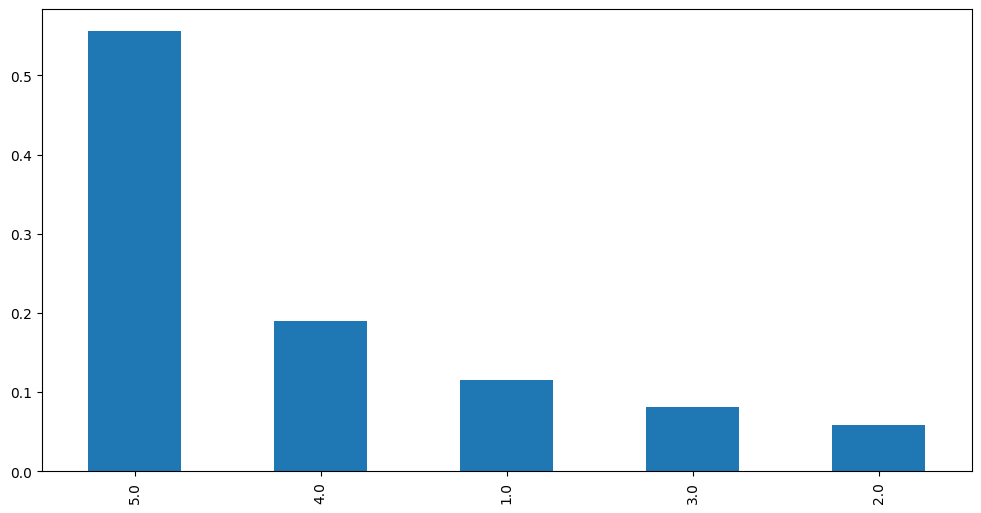

In [ ]:
#Create the plot and provide observations

plt.figure(figsize = (12,6))
df['rating'].value_counts(1).plot(kind='bar')
plt.show()

### No of unique users and items

In [ ]:
# Number of unique user id and product id in the data
print('Number of unique USERS in Raw data = ', df['user_id'].nunique())
print('Number of unique STORES in Raw data = ', df['store_id'].nunique())

### Users with most no of rating

In [ ]:
# Top 10 users based on rating
most_rated = df.groupby('user_id').size().sort_values(ascending=False)[:10]
most_rated

## Pre-Processing

Let's take a subset of the dataset (by only keeping the users who have given 50 or more ratings) to make the dataset less sparse and easy to work with.

In [ ]:
counts = df['user_id'].value_counts()
df_final = df[df['user_id'].isin(counts[counts >= 50].index)]

In [ ]:
# Code to print the number of observations, unique user IDs, and unique store IDs in a DataFrame

# Assuming 'dataframe' is your DataFrame variable and it contains columns 'user_id' and 'store_id'
observations_final_count = len(dataframe)
unique_users_final_count = dataframe['user_id'].nunique()
unique_stores_final_count = dataframe['store_id'].nunique()

# Displaying the information
print(f"Number of Observations in the Final Data: {observations_final_count}")
print(f"Number of Unique Users in the Final Data: {unique_users_final_count}")
print(f"Number of Unique Stores in the Final Data: {unique_stores_final_count}")

- The dataframe **df_final has users who have rated 50 or more items**
- **We will use df_final to build recommendation systems**

### Checking the density of the rating matrix

In [ ]:
#Creating the interaction matrix of products and users based on ratings and replacing NaN value with 0
final_ratings_matrix = df_final.pivot(index = 'user_id', columns ='store_id', values = 'rating').fillna(0)
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)

#Finding the number of non-zero entries in the interaction matrix
given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)

#Finding the possible number of ratings as per the number of users and products
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)

#Density of ratings
density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

final_ratings_matrix.head()

# Rank Based Recommendation System

In [ ]:
#Calculate the average rating for each product
average_rating = df_final.groupby('store_id').mean()['rating']

#Calculate the count of ratings for each product
count_rating = df_final.groupby('store_id').count()['rating']

#Create a dataframe with calculated average and count of ratings
final_rating = pd.DataFrame({'avg_rating':average_rating, 'rating_count':count_rating})

#Sort the dataframe by average of ratings
final_rating = final_rating.sort_values(by='avg_rating',ascending=False)

final_rating.head()

In [ ]:
#defining a function to get the top n products based on highest average rating and minimum interactions
def top_n_products(final_rating, n, min_interaction):

    #Finding products with minimum number of interactions
    recommendations = final_rating[final_rating['rating_count']>min_interaction]

    #Sorting values w.r.t average rating
    recommendations = recommendations.sort_values('avg_rating',ascending=False)

    return recommendations.index[:n]